##  简介


In [1]:
# 加载数据
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# index_col 指定索引列， parse_dates=True 解析日期数据为datetime类型
fifa_data = pd.read_csv('data/fifa.csv',index_col='Date',parse_dates=True)
fifa_data.head()


,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


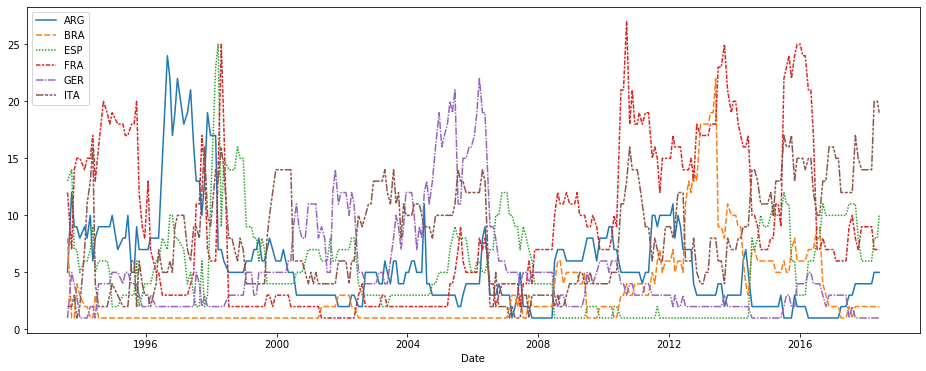

In [2]:
# seaborn 绘图
import seaborn as sns
plt.figure(figsize=(16,6))
sns.lineplot(data=fifa_data)


## Seaborn绘制单变量图

### 直方图


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

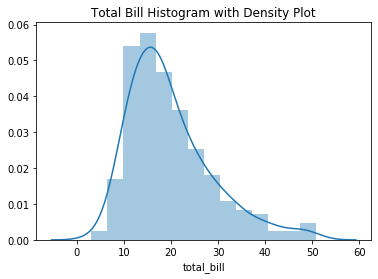

In [3]:
# 使用sns.distplot创建直方图，如下所示：
import seaborn as sns
#加载seaborn的自带数据
tips = sns.load_dataset('tips')
#使用subplots函数创建画布，并在其中添加子图
hist,ax=plt.subplots()
# 使用seaborn的displot函数绘图
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')


Text(0, 0.5, 'Frequency')

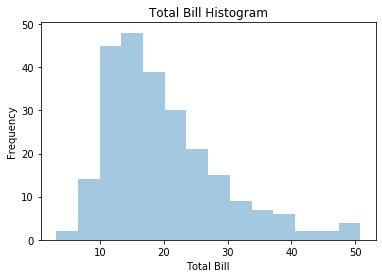

In [4]:
hist,ax=plt.subplots()
# 使用seaborn的displot函数绘图
ax = sns.distplot(tips['total_bill'],kde = False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')


### 密度图（核密度估计）


Text(0, 0.5, 'Frequency')

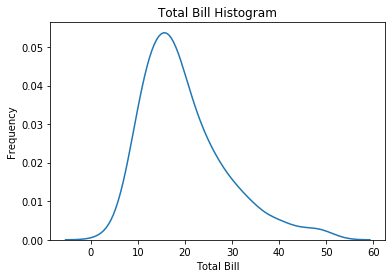

In [5]:
# 密度图是展示单变量分布的另一种方法，本质上是通过绘制每个数据点为中心的正态分布，然后消除重叠的图，使曲线下的面积为1来创建的
hist,ax=plt.subplots()
# 使用seaborn的displot函数绘图
ax = sns.distplot(tips['total_bill'],hist = False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')
# 如果只绘制密度图，还可以使用sns.kdeplot函数



### 频数图


Text(0.5, 0, 'Total Bill')

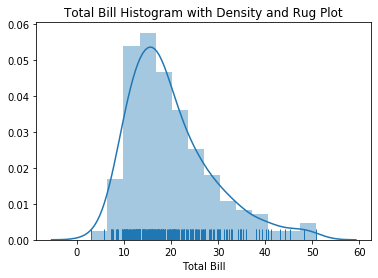

In [6]:
# 频数图是变量分布的一维表示，常与其他图一起使用，以增强可视化效果。
# 下图展示的是带密度图和频数图的直方图
hist,ax=plt.subplots()
# 使用seaborn的displot函数绘图
ax = sns.distplot(tips['total_bill'],rug = True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')


### 计数图（条形图）


Text(0, 0.5, 'Frequency')

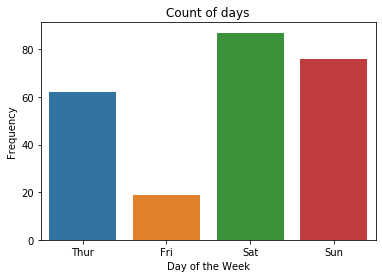

In [7]:
# 计数图和直方图很像，直方图通过对数据分组来描述分布，计数图（条形图）是对离散变量（分类变量）计数。
count,ax = plt.subplots()
ax = sns.countplot('day',data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')


## Seaborn 双变量数据可视化

### 散点图


Text(0, 0.5, 'Tip')

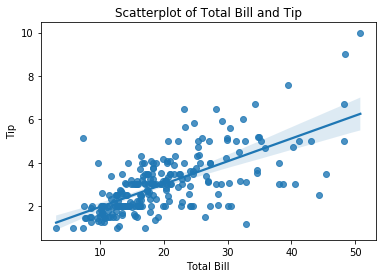

In [8]:
# 在seaborn中，创建散点图的方法有很多，但是并没有名为scatter的函数。
# 创建散点图可以使用regplot函数。regplot不仅可以绘制散点图，还会拟合回归线，把fit_reg设置为False，将只显示散点图
figure,ax = plt.subplots()
ax = sns.regplot(x='total_bill',y='tip',data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')



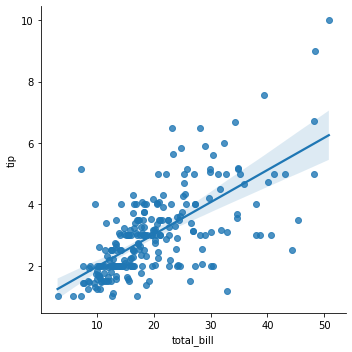

In [9]:
# lmplot函数和regplot函数类似，也可以用于创建散点图。
# lmplot函数内部会调用regplot，两者的主要区别是regplot创建坐标轴，而lmplot创建图
fig = sns.lmplot(x='total_bill',y='tip',data = tips)


Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

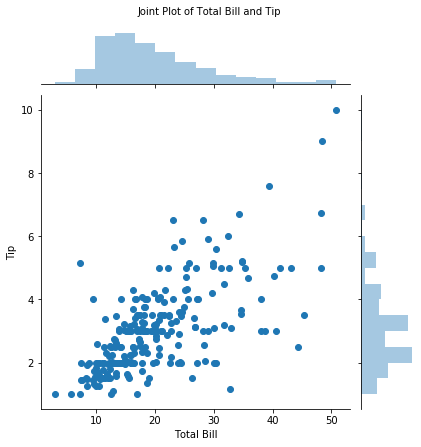

In [10]:
# 还可以使用jointplot在每个轴上创建包含单个变量的散点图。
joint = sns.jointplot(x='total_bill',y='tip',data = tips)
joint.set_axis_labels(xlabel = 'Total Bill',ylabel='Tip')
# 添加标题，设置字号
# 移动轴域上方的文字
joint.fig.suptitle('Joint Plot of Total Bill and Tip',fontsize = 10,y=1.03)


### 蜂巢图


Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

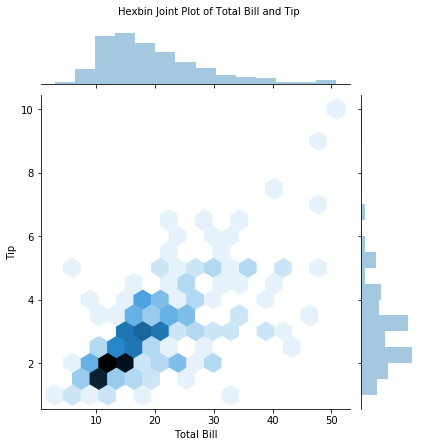

In [11]:
# 使用Seaborn的jointplot绘制蜂巢图，和使用matplotlib的hexbin函数进行绘制
joint = sns.jointplot(x='total_bill',y='tip',data = tips,kind='hex')
joint.set_axis_labels(xlabel = 'Total Bill',ylabel='Tip')
joint.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip',fontsize = 10,y=1.03)



### 2D密度图


Text(0, 0.5, 'Tip')

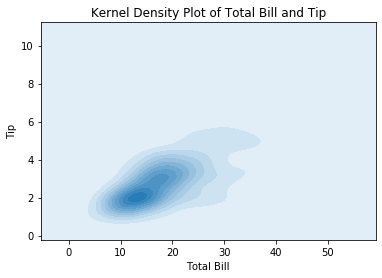

In [12]:
# 2D核密度图和kdeplot类似，但2D核密度图课展示两个变量
kde,ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],data2=tips['tip'],shade=True) #是否填充轮廓
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')



Text(0, 0.5, 'Tip')

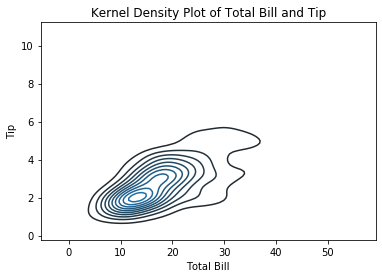

In [13]:
kde,ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],data2=tips['tip'],shade=False) #是否填充轮廓
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')


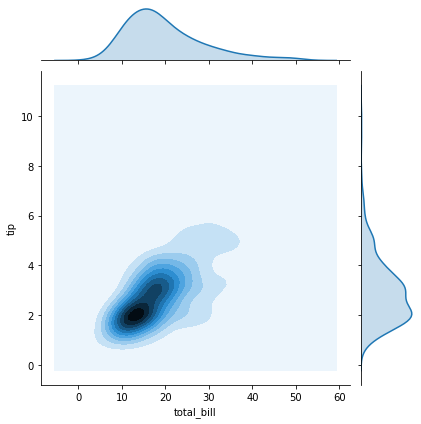

In [14]:
kde_joint = sns.jointplot(x = 'total_bill',y='tip',data=tips,kind = 'kde')


### 条形图


Text(0, 0.5, 'Average total bill')

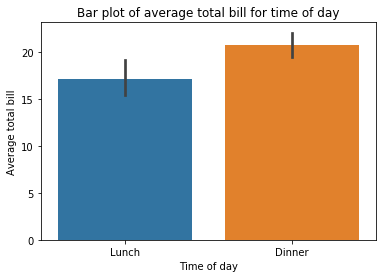

In [15]:
# 条形图也可以用于展现多个变量，barplot默认会计算平均值
import numpy as np
bar,ax = plt.subplots()
ax = sns.barplot(x='time',y='total_bill',data=tips) 
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')



### 箱线图


Text(0, 0.5, 'Total Bill')

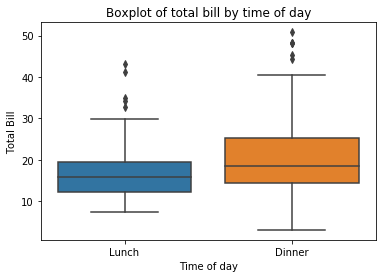

In [16]:
# 箱线图用于显示多种统计信息：最小值，1/4分位，中位数，3/4分位，最大值，以及离群值（如果有）
box,ax = plt.subplots()
ax = sns.boxplot(x='time',y='total_bill',data = tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')


### 小提琴图


Text(0, 0.5, 'Total Bill')

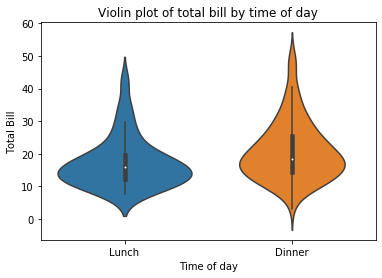

In [17]:
# 箱线图是经典的可视化方法，但可能会掩盖数据的分布，小提琴图能显示与箱线图相同的值
# 小提琴图把"箱线"绘成核密度估计，有助于保留数据的更多可视化信息
box,ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill',data = tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')


### 成对关系


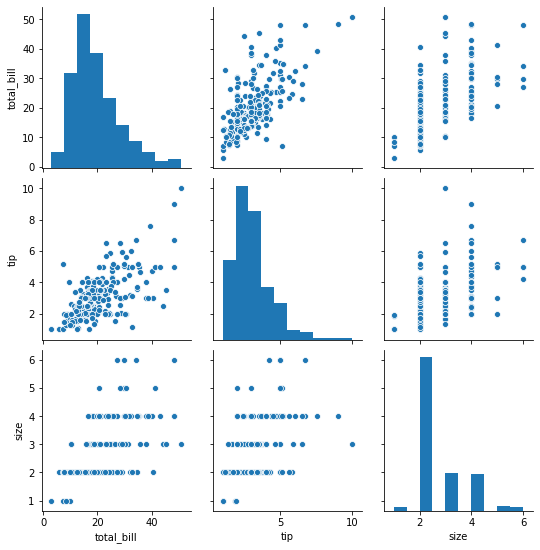

In [18]:
# 当大部分数据是数值时，可以使用pairplot函数把所有成对关系绘制出来
# pairplot函数会为单变量绘制直方图，双变量绘制散点图
# pairplot的缺点是存在冗余信息，图的上半部分和下半部分相同

fig = sns.pairplot(tips)


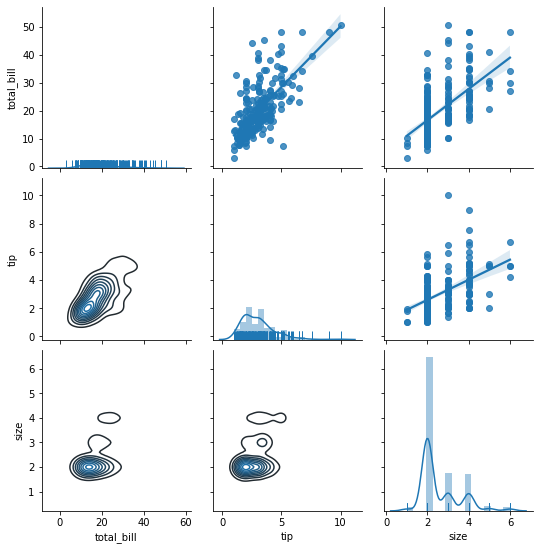

In [19]:
# 可以使用pairgrid手动指定图的上半部分和下半部分
pair_grid = sns.PairGrid(tips)
pair_grid.map_upper(sns.regplot)
pair_grid.map_lower(sns.kdeplot)
pair_grid.map_diag(sns.distplot,rug=True)

## 多变量数据


### 通过颜色区分

Text(0, 0.5, 'Total Bill')

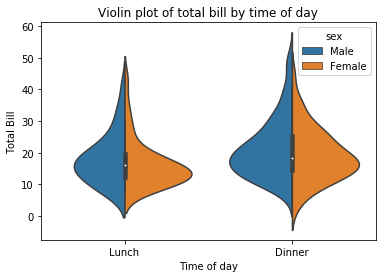

In [20]:
# 使用violinplot函数时，可以通过hue参数按性别（sex）给图着色
# 可以为“小提琴”的左右两半着不同颜色，用于区分性别
box,ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data = tips,split = True)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')


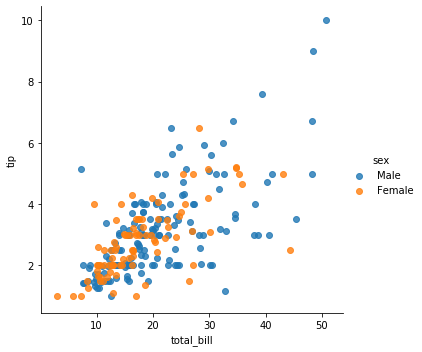

In [22]:
# 其它绘图函数中也存在hue参数
scatter = sns.lmplot(x='total_bill',y='tip',data = tips,hue='sex',fit_reg = False)


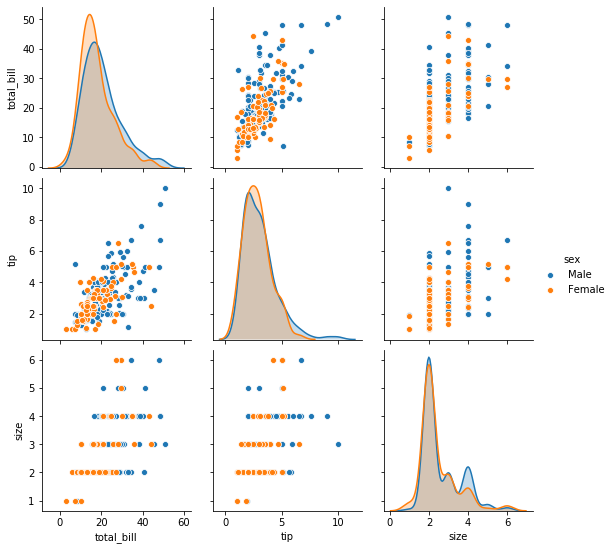

In [23]:
# 通过向hue参数传入一个类别变量，可以让pairplot变得更有意义
fig = sns.pairplot(tips,hue = 'sex')



### 通过大小和形状区分

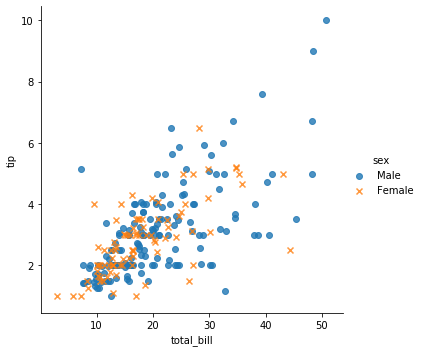

In [24]:
# 可以通过点的大小表示更多信息，但通过大小区分应谨慎使用，当大小差别不大时很难区分
# 在Seaborn中的lmplot，可以通过scatter_kws参数来控制散点图点的大小
scatter = sns.lmplot(x='total_bill',y='tip',data = tips,fit_reg=False,hue='sex',markers=['o','x'])




### 分面

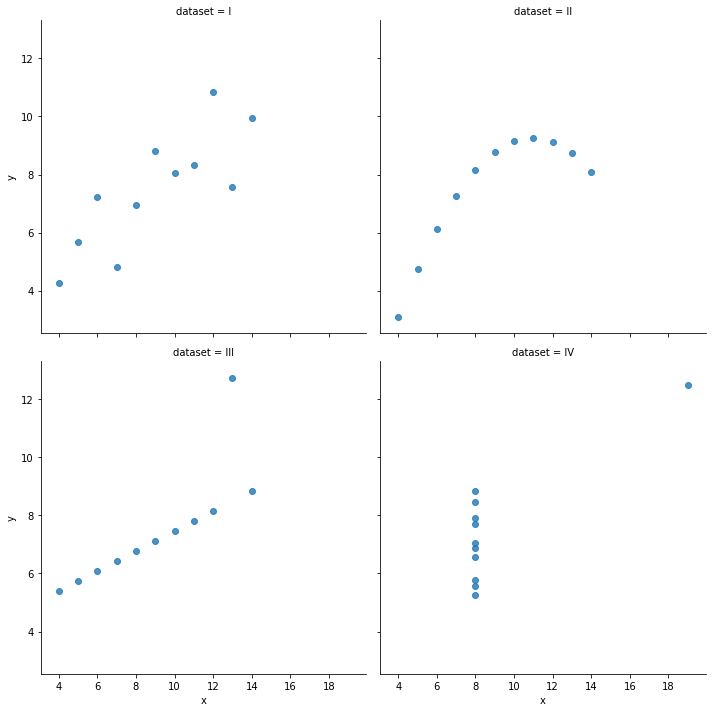

In [28]:
# 使用seaborn的lmplot函数重新绘制Anscombe数据

import seaborn as sns
anscombe = sns.load_dataset('anscombe')
#col 用于指定分面变量 这里指定 'dataset' 列中，每个取值创建一张散点图
#col_wrap 用于指定绘制的图形有几列
anscombe_plot = sns.lmplot(x = 'x',y='y',data = anscombe,fit_reg = False,col = 'dataset',col_wrap = 2)


/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


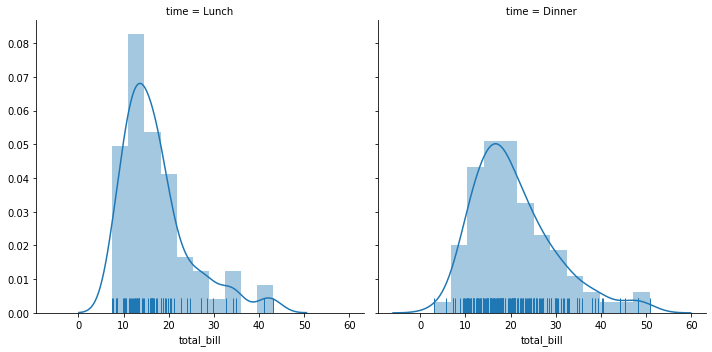

In [29]:
# 如果是返回axes的函数，必须先创建FacetGrid，通过FacetGrid创建分面
facet = sns.FacetGrid(tips,col = 'time',size = 5)
facet.map(sns.distplot,'total_bill',rug = True)


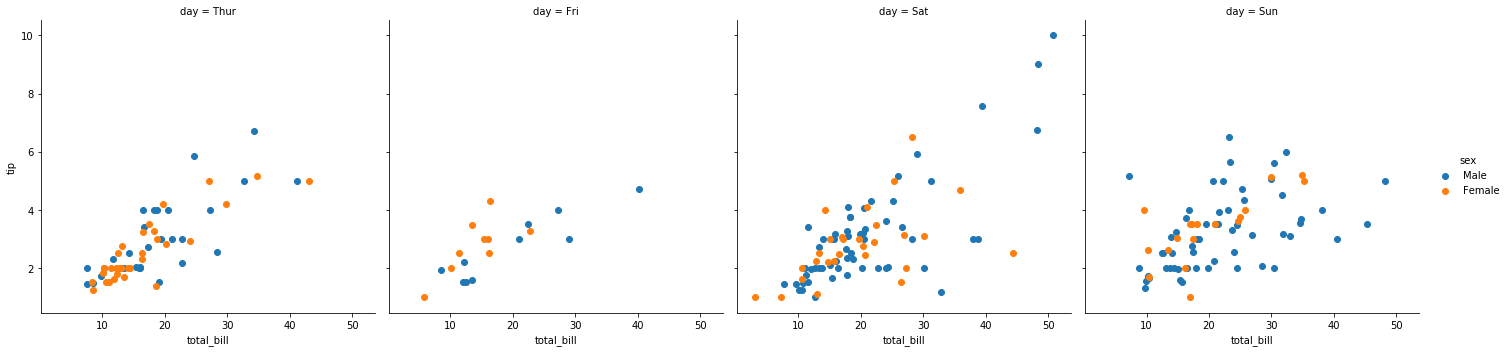

In [30]:
# FacetGrid中绘图可以直接调用matplotlib中的绘图方法
facet = sns.FacetGrid(tips,col = 'day',hue = 'sex',size=5)
facet.map(plt.scatter,'total_bill','tip')
facet.add_legend()


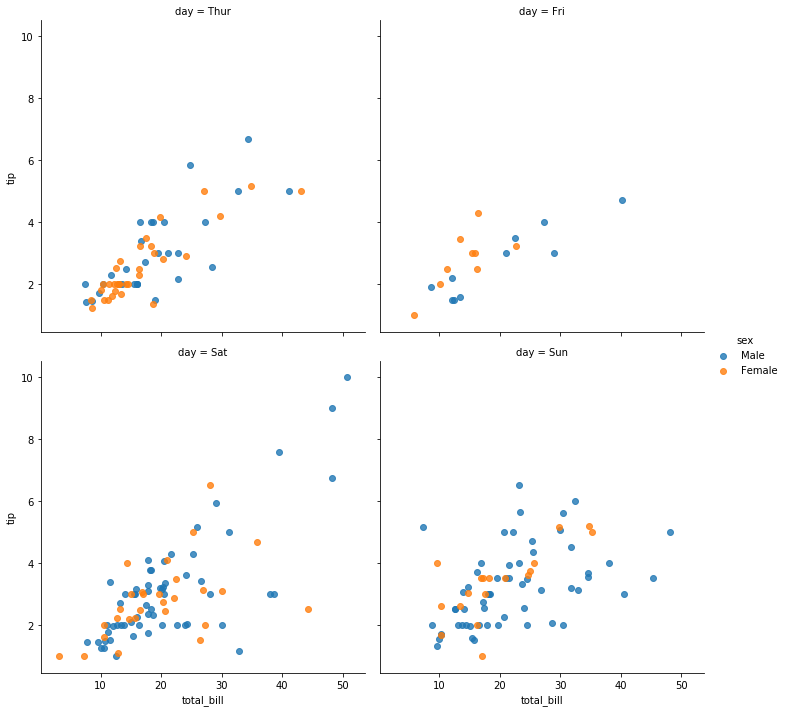

In [31]:
# 相同的效果也可以使用seaborn的lmplot实现
fig = sns.lmplot(x = 'total_bill',y = 'tip',data =tips,fit_reg = False,hue = 'sex',col = 'day',col_wrap=2)



## Seaborn主题和样式


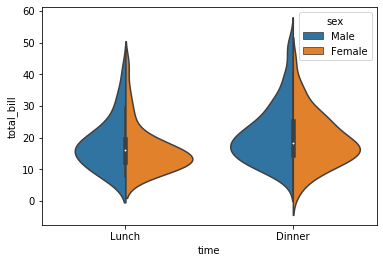

In [32]:
fig,ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data = tips,split = True)


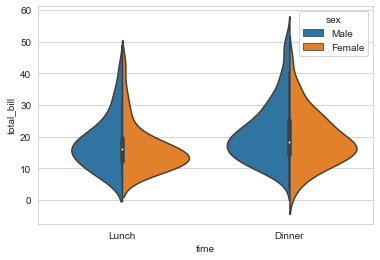

In [34]:
# 通过set_style设置样式
sns.set_style('whitegrid')
fig,ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data = tips,split = True)
